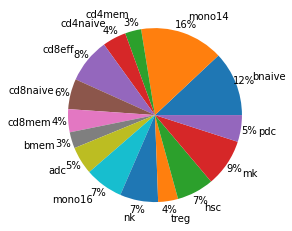

In [245]:
import torch
import torch.nn as nn
import pandas as pd
from network import D1, D2, D3
import matplotlib.pyplot as plt

gene = pd.read_csv("../Source/gene.csv").iloc[:,0]
cell_type = pd.read_csv("../Source/celltype.csv").iloc[:,0]

DM1 = D1(1158, 15)
DM2 = D2(1158, 15)
DM3 = D3(1158, 15)
DM1.load_state_dict(torch.load("./model_pt/checkpoint1.pt"))
DM2.load_state_dict(torch.load("./model_pt/checkpoint2.pt"))
DM3.load_state_dict(torch.load("./model_pt/checkpoint3.pt"))
DM1.eval()
DM2.eval()
DM3.eval()

sample = pd.read_csv("../Source/Example.csv",header=None)
sample.columns = ["index","Gene","Sample_exp"]

pre1 = DM1(torch.tensor([sample.Sample_exp.to_numpy()], dtype=torch.float32))
pre2 = DM2(torch.tensor([sample.Sample_exp.to_numpy()], dtype=torch.float32))
pre3 = DM3(torch.tensor([sample.Sample_exp.to_numpy()], dtype=torch.float32))

pre = ((pre1+pre2+pre3)/3).detach().numpy()[0]


plt.pie(pre, labels=cell_type, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.savefig("../Result/result.png")